<a href="https://colab.research.google.com/github/zoya-ivanova/-Data-Science/blob/main/%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D1%8C%D1%8F_%D0%B0%D1%81%D1%81%D0%B0%D0%BC%D0%B1%D0%BB%D0%B8%D1%80_%D1%81%D0%BB%D1%83%D1%87%D0%BB%D0%B5%D1%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 1. **Деревья решений (Decision Trees)**: Модель предсказательной аналитики, которая может использоваться как в задачах классификации, так и регрессии. Дерево решений строит модель предсказаний в форме дерева, разделяя набор данных на меньшие подмножества на основе ответов на вопросы о признаках.

2. **Ансамблирование (Ensembling)**: Метод машинного обучения, в котором строятся и комбинируются множество моделей (часто деревьев решений) для улучшения стабильности и точности предсказаний. Ансамбли могут быть очень эффективными и часто используются в практических приложениях.

3. **Random Forest (Случайный лес)**: Тип ансамблевой модели, состоящий из большого количества деревьев решений, которые работают как единая система. Каждое дерево в лесу строится из случайно выбранной подвыборки обучающих данных. Прогнозы от всех деревьев усредняются для получения окончательного прогноза.

4. **Gradient Boosting**: Ансамблевая техника, которая строит модели последовательно. Каждая новая модель корректирует ошибки предыдущей, стремясь улучшить общую производительность. Эта техника эффективна в ряде задач прогнозирования.

5. **Параметры деревьев решений**: Настройки, такие как глубина дерева (max_depth), минимальное количество образцов для разделения узла (min_samples_split), которые можно настраивать, чтобы контролировать сложность модели и предотвратить переобучение.

6. **Важность признаков**: Метод оценки, который показывает, как велико влияние каждого признака на предсказания модели. Особенно полезно для понимания, какие аспекты данных наиболее значимы для модели.

Ансамблирование и деревья решений - это мощные инструменты в машинном обучении, которые могут обеспечивать высокую точность и устойчивость для сложных задач прогнозирования. Есть ли вопросы по этим темам, которые вы хотели бы обсудить дополнительно?

**Подготовка и предобработка данных для моделирования**

Цель: Подготовить данные о недвижимости для последующего анализа с помощью методов машинного обучения.

1. Загрузка данных: Импортируйте датасет, используя библиотеку pandas и просмотрите базовую информацию о структуре и типах данных.

2. Предобработка данных:
   - Обработайте пропущенные значения, если они есть. В данном случае все значения non-null, но всегда проверяйте.
   - Преобразуйте категориальные признаки в числовые с помощью подходов One-Hot Encoding или Label Encoding для столбцов `tenure`, `street` и `nearest_station_name`.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

In [ ]:
df_dep = pd.read_csv('/content/london_house_prices.csv')

In [ ]:
df_dep.head()

,id,bedrooms,bathrooms,tenure,garden,street,size_sqft,price_pounds,nearest_station_name,nearest_station_miles,postcode_outer
0,132180206,5.0,4.0,freehold,0,"Ladbroke Grove, London",NaN,10500000,Holland Park Station,0.2,NaN
1,134996630,6.0,5.0,freehold,0,"Murray Road, Wimbledon Village, SW19",NaN,8950000,Wimbledon Station,0.3,SW19
2,134169233,7.0,5.0,freehold,1,"Southside Common, Wimbledon Village, SW19",NaN,11950000,Wimbledon Station,0.7,SW19
3,132180206,5.0,4.0,freehold,0,"Ladbroke Grove, London",NaN,10500000,Holland Park Station,0.2,NaN
4,134996630,6.0,5.0,freehold,0,"Murray Road, Wimbledon Village, SW19",NaN,8950000,Wimbledon Station,0.3,SW19


In [ ]:
df_dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     934 non-null    int64  
 1   bedrooms               919 non-null    float64
 2   bathrooms              899 non-null    float64
 3   tenure                 922 non-null    object 
 4   garden                 934 non-null    int64  
 5   street                 934 non-null    object 
 6   size_sqft              417 non-null    float64
 7   price_pounds           934 non-null    int64  
 8   nearest_station_name   934 non-null    object 
 9   nearest_station_miles  934 non-null    float64
 10  postcode_outer         797 non-null    object 
dtypes: float64(4), int64(3), object(4)
memory usage: 80.4+ KB


Описание признаков:

0. id: Уникальный идентификатор объекта. (int64)

1. bedrooms: Количество спален. (float64)

2. bathrooms: Количество ванных комнат. (float64)

3. tenure: Тип владения (например, аренда, собственность). (object)

4. garden: Наличие сада (1 - есть, 0 - нет). (int64)

5. street: Название улицы. (object)

6. size_sqft: Площадь в квадратных футах. (float64)

7. price_pounds: Цена в фунтах стерлингов. (int64)

8. nearest_station_name: Название ближайшей станции метро. (object)

9. nearest_station_miles: Расстояние до ближайшей станции метро в милях. (float64)

10. postcode_outer: Внешний почтовый индекс.

In [ ]:
df_dep.drop(['id', 'postcode_outer'], axis=1, inplace=True)

In [ ]:
df_dep.isna().sum()

bedrooms                  15
bathrooms                 35
tenure                    12
garden                     0
street                     0
size_sqft                517
price_pounds               0
nearest_station_name       0
nearest_station_miles      0
dtype: int64

<Axes: xlabel='price_pounds', ylabel='Density'>

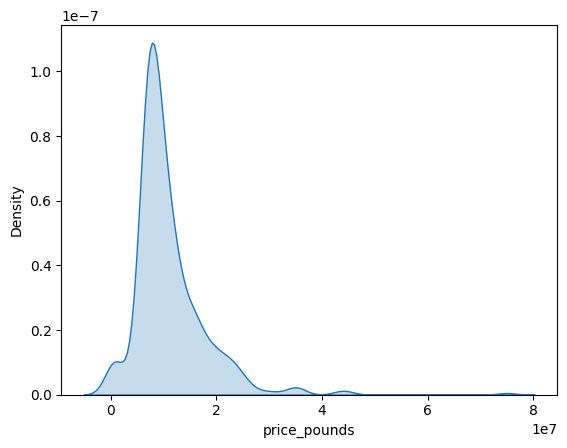

In [ ]:
sns.kdeplot(df_dep['price_pounds'], fill=True)

<Axes: xlabel='price_pounds'>

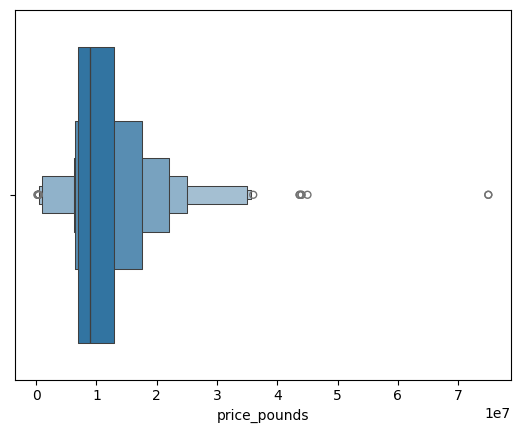

In [ ]:
sns.boxenplot(x = df_dep['price_pounds'])

In [ ]:
df_dep['price_pounds'].describe()

count    9.340000e+02
mean     1.104846e+07
std      6.892229e+06
min      2.000000e+05
25%      7.000000e+06
50%      9.000000e+06
75%      1.284600e+07
max      7.500000e+07
Name: price_pounds, dtype: float64

In [ ]:
df_dep['price_pounds'] = df_dep['price_pounds'] / 1000

<Axes: xlabel='price_pounds'>

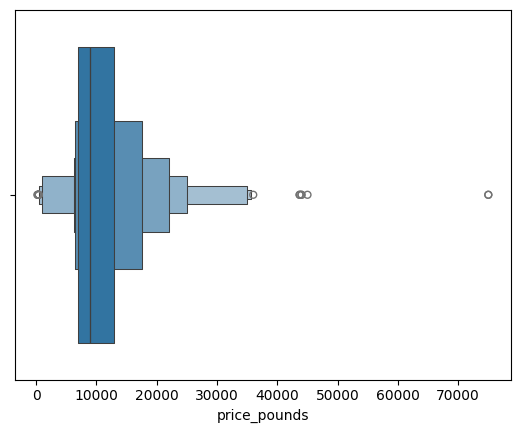

In [ ]:
sns.boxenplot(x = df_dep['price_pounds'])

In [ ]:
df_dep['price_pounds'].describe()

count      934.000000
mean     11048.464392
std       6892.228776
min        200.000000
25%       7000.000000
50%       9000.000000
75%      12846.000000
max      75000.000000
Name: price_pounds, dtype: float64

In [ ]:
df_dep[df_dep['size_sqft'].isna() & df_dep['bathrooms'].isna()]

,bedrooms,bathrooms,tenure,garden,street,size_sqft,price_pounds,nearest_station_name,nearest_station_miles
23,NaN,NaN,leasehold,3,"Hampstead, NW3",NaN,20000.0,Hampstead Station,0.3
58,24.0,NaN,freehold,0,"119 & 121 Warwick Road, Earl's Court, London, ...",NaN,8500.0,Earls Court Station,0.3
167,NaN,NaN,ask agent,0,"Keel House, 1 Cowley Business Park, Highstreet...",NaN,10000.0,Uxbridge Station,0.9
193,NaN,NaN,NaN,0,"Bellerive House, 3 Muirfield Crescent, London",NaN,15000.0,Crossharbour & London Arena Station,0.2
369,NaN,NaN,NaN,1,"Golf Club Road, St George's Hill, Weybridge, S...",NaN,17000.0,Weybridge Station,0.8
382,NaN,NaN,freehold,0,"Arlington Street, St James's",NaN,8500.0,Green Park Station,0.2
388,3.0,NaN,leasehold,0,"Buckingham Gate, London",NaN,9500.0,Victoria Station,0.3
471,4.0,NaN,leasehold,0,"Davies Street, Mayfair, W1K",NaN,7000.0,Bond Street Station,0.2
548,4.0,NaN,leasehold,0,"Davies Street, Mayfair, W1K",NaN,7000.0,Bond Street Station,0.2
626,4.0,NaN,leasehold,0,"Apartment 9, 10 Montrose Place, London, SW1X 7DU",NaN,7750.0,Hyde Park Corner Station,0.2


In [ ]:
df_dep = df_dep.dropna(subset=['size_sqft', 'bathrooms', 'bedrooms'], how='all')

In [ ]:
df_dep.isna().sum()

bedrooms                   5
bathrooms                 25
tenure                     9
garden                     0
street                     0
size_sqft                507
price_pounds               0
nearest_station_name       0
nearest_station_miles      0
dtype: int64

<Axes: xlabel='price_pounds'>

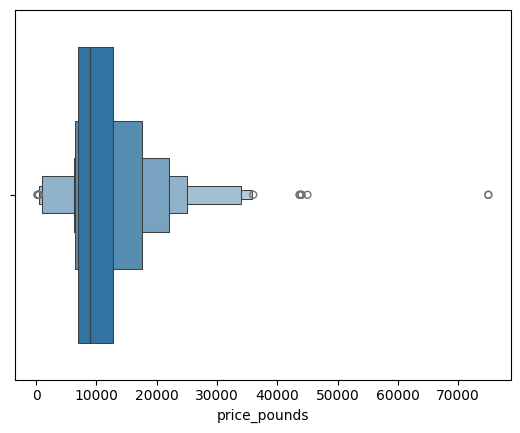

In [ ]:
sns.boxenplot(x = df_dep['price_pounds'])

<Axes: xlabel='size_sqft'>

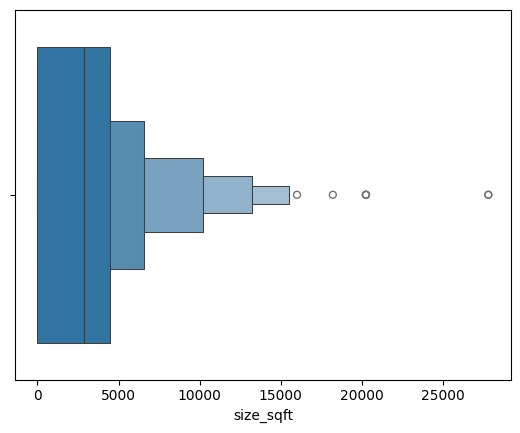

In [ ]:
sns.boxenplot(x = df_dep['size_sqft'])

In [ ]:
df_dep = df_dep.dropna(subset=['bathrooms', 'bedrooms', 'tenure'])

In [ ]:
df_dep.isna().sum()

bedrooms                   0
bathrooms                  0
tenure                     0
garden                     0
street                     0
size_sqft                496
price_pounds               0
nearest_station_name       0
nearest_station_miles      0
dtype: int64

In [ ]:
df_dep.bedrooms.value_counts()

bedrooms
3.0     221
4.0     161
5.0     160
6.0     154
7.0      85
2.0      32
8.0      30
10.0     16
9.0      10
1.0       7
12.0      4
11.0      3
14.0      2
16.0      1
13.0      1
28.0      1
15.0      1
Name: count, dtype: int64

In [ ]:
df_dep[df_dep['bedrooms']>9.0]

,bedrooms,bathrooms,tenure,garden,street,size_sqft,price_pounds,nearest_station_name,nearest_station_miles
65,12.0,12.0,freehold,0,"Denham Place, Denham, Buckinghamshire, UB9 5BL",NaN,75000.0,Denham Station,0.4
90,10.0,10.0,freehold,1,"Ennismore Gardens, Knightsbridge, London, SW7",NaN,23950.0,Knightsbridge Station,0.4
117,10.0,10.0,freehold,0,"Ennismore Gardens, London, SW7",10606.0,23950.0,Knightsbridge Station,0.4
162,11.0,6.0,freehold,1,"Parkside, Wimbledon, London, SW19",NaN,7495.0,Wimbledon Station,1.1
170,10.0,10.0,freehold,0,"Lowndes Street, London, SW1X",7656.0,16500.0,Knightsbridge Station,0.3
262,16.0,1.0,ask agent,0,"Canary Wharf, Canary Wharf, E14",NaN,7350.0,South Quay Station,0.1
268,10.0,11.0,freehold,0,"Kenwood House, Harper Lane, Radlett, WD7",15000.0,20000.0,Radlett Station,0.9
347,11.0,6.0,freehold,0,"Parkside, Wimbledon, SW19",NaN,7495.0,Wimbledon Station,0.9
375,13.0,19.0,freehold,0,"Winnington Road, London, N2",0.0,11950.0,Golders Green Station,0.9
397,10.0,4.0,freehold,1,"Castelnau, Barnes, London, SW13",0.0,7950.0,Barnes Bridge Station,0.7


In [ ]:
# Сначала проверим все необходимые столбцы, особенно для 'size_sqft' и 'bedrooms'
if 'size_sqft' in df_dep.columns and 'bedrooms' in df_dep.columns:
    # Вычисляем среднее значение 'size_sqft' для каждого значения 'bedrooms'
    mean_size_per_bedroom = df_dep.groupby('bedrooms')['size_sqft'].mean()

    # Функция для заполнения NaN значений средними
    def fill_missing_sizes(row):
        if pd.isna(row['size_sqft']):
            return mean_size_per_bedroom.get(row['bedrooms'], row['size_sqft'])
        return row['size_sqft']

    # Применяем функцию
    df_dep['size_sqft'] = df_dep.apply(fill_missing_sizes, axis=1)
else:
    print("Один из необходимых столбцов отсутствует в DataFrame.")

<ipython-input-63-fac15a555e5e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dep['size_sqft'] = df_dep.apply(fill_missing_sizes, axis=1)


In [ ]:
df_dep.isna().sum()

bedrooms                 0
bathrooms                0
tenure                   0
garden                   0
street                   0
size_sqft                4
price_pounds             0
nearest_station_name     0
nearest_station_miles    0
dtype: int64

<Axes: xlabel='size_sqft'>

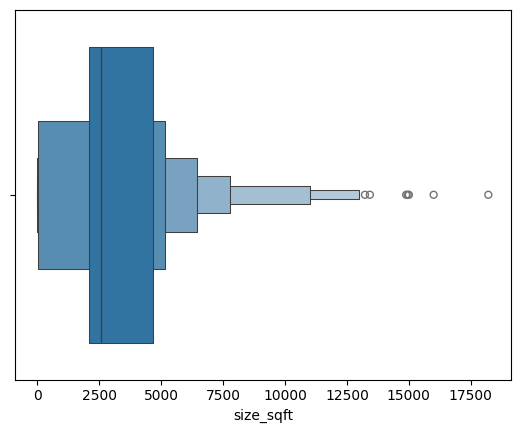

In [ ]:
sns.boxenplot(x = df_dep['size_sqft'])

In [ ]:
df_dep = df_dep.dropna(subset=['size_sqft'])

In [ ]:
df_dep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 885 entries, 0 to 933
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bedrooms               885 non-null    float64
 1   bathrooms              885 non-null    float64
 2   tenure                 885 non-null    object 
 3   garden                 885 non-null    int64  
 4   street                 885 non-null    object 
 5   size_sqft              885 non-null    float64
 6   price_pounds           885 non-null    float64
 7   nearest_station_name   885 non-null    object 
 8   nearest_station_miles  885 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 69.1+ KB


In [ ]:
print("Распределение признака 'tenure':\n", df_dep['tenure'].value_counts())
print("Распределение признака 'garden':\n", df_dep['garden'].value_counts())
print("Распределение признака 'nearest_station_name':\n", df_dep['nearest_station_name'].value_counts())

Распределение признака 'tenure':
 tenure
freehold             420
leasehold            355
share of freehold     58
ask agent             52
Name: count, dtype: int64
Распределение признака 'garden':
 garden
1    386
0    361
2    112
3     25
4      1
Name: count, dtype: int64
Распределение признака 'nearest_station_name':
 nearest_station_name
Knightsbridge Station             78
Bond Street Station               56
Sloane Square Station             53
South Kensington Station          48
High Street Kensington Station    38
                                  ..
Oxshott Station                    1
Tooting Station                    1
Shenfield Station                  1
Mill Hill East Station             1
Kidbrooke Station                  1
Name: count, Length: 139, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Создание экземпляра LabelEncoder
encoder = LabelEncoder()

# Обучение encoder'а и преобразование столбца 'tenure'
df_dep['tenure_encoded'] = encoder.fit_transform(df_dep['tenure'])

# Показываем присвоенные метки
categories = list(encoder.classes_)
print("Категории и их соответствующие коды:", dict(zip(categories, range(len(categories)))))

df_dep.head()

Категории и их соответствующие коды: {'ask agent': 0, 'freehold': 1, 'leasehold': 2, 'share of freehold': 3}


<ipython-input-69-aca63933fbb9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dep['tenure_encoded'] = encoder.fit_transform(df_dep['tenure'])


,bedrooms,bathrooms,tenure,garden,street,size_sqft,price_pounds,nearest_station_name,nearest_station_miles,tenure_encoded
0,5.0,4.0,freehold,0,"Ladbroke Grove, London",2513.164557,10500.0,Holland Park Station,0.2,1
1,6.0,5.0,freehold,0,"Murray Road, Wimbledon Village, SW19",4682.846154,8950.0,Wimbledon Station,0.3,1
2,7.0,5.0,freehold,1,"Southside Common, Wimbledon Village, SW19",5154.606061,11950.0,Wimbledon Station,0.7,1
3,5.0,4.0,freehold,0,"Ladbroke Grove, London",2513.164557,10500.0,Holland Park Station,0.2,1
4,6.0,5.0,freehold,0,"Murray Road, Wimbledon Village, SW19",4682.846154,8950.0,Wimbledon Station,0.3,1


In [ ]:
frequency_map = df_dep['nearest_station_name'].value_counts(normalize=True)

# Применение частоты встречаемости в качестве кодировки
df_dep['nearest_station_name_encoded'] = df_dep['nearest_station_name'].map(frequency_map)

df_dep[['nearest_station_name', 'nearest_station_name_encoded']].head()

<ipython-input-70-ee6e49a78625>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dep['nearest_station_name_encoded'] = df_dep['nearest_station_name'].map(frequency_map)


,nearest_station_name,nearest_station_name_encoded
0,Holland Park Station,0.014689
1,Wimbledon Station,0.015819
2,Wimbledon Station,0.015819
3,Holland Park Station,0.014689
4,Wimbledon Station,0.015819


In [ ]:
df_dep['street'].value_counts()

street
Moxon Street, London, W1U                      8
Canary Wharf,\r\nLondon, \r\nE14 9QG           5
Lowndes Square, London, SW1X                   5
Damac Tower, Nine Elms, London                 5
St. Mary Abbots Place, London, W8              5
                                              ..
Gloucester Gate, Regent's Park, London, NW1    1
Connaught Place, Hyde Park, London, W2.        1
Tite Street, London, SW3                       1
Kenwood House, Harper Lane, Radlett, WD7       1
Principal Tower, City of London                1
Name: count, Length: 673, dtype: int64

In [ ]:
df_dep.drop(['tenure', 'nearest_station_name', 'street'], axis=1, inplace=True)
df_dep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 885 entries, 0 to 933
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedrooms                      885 non-null    float64
 1   bathrooms                     885 non-null    float64
 2   garden                        885 non-null    int64  
 3   size_sqft                     885 non-null    float64
 4   price_pounds                  885 non-null    float64
 5   nearest_station_miles         885 non-null    float64
 6   tenure_encoded                885 non-null    int64  
 7   nearest_station_name_encoded  885 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 62.2 KB


<ipython-input-72-31a3ed345c58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dep.drop(['tenure', 'nearest_station_name', 'street'], axis=1, inplace=True)


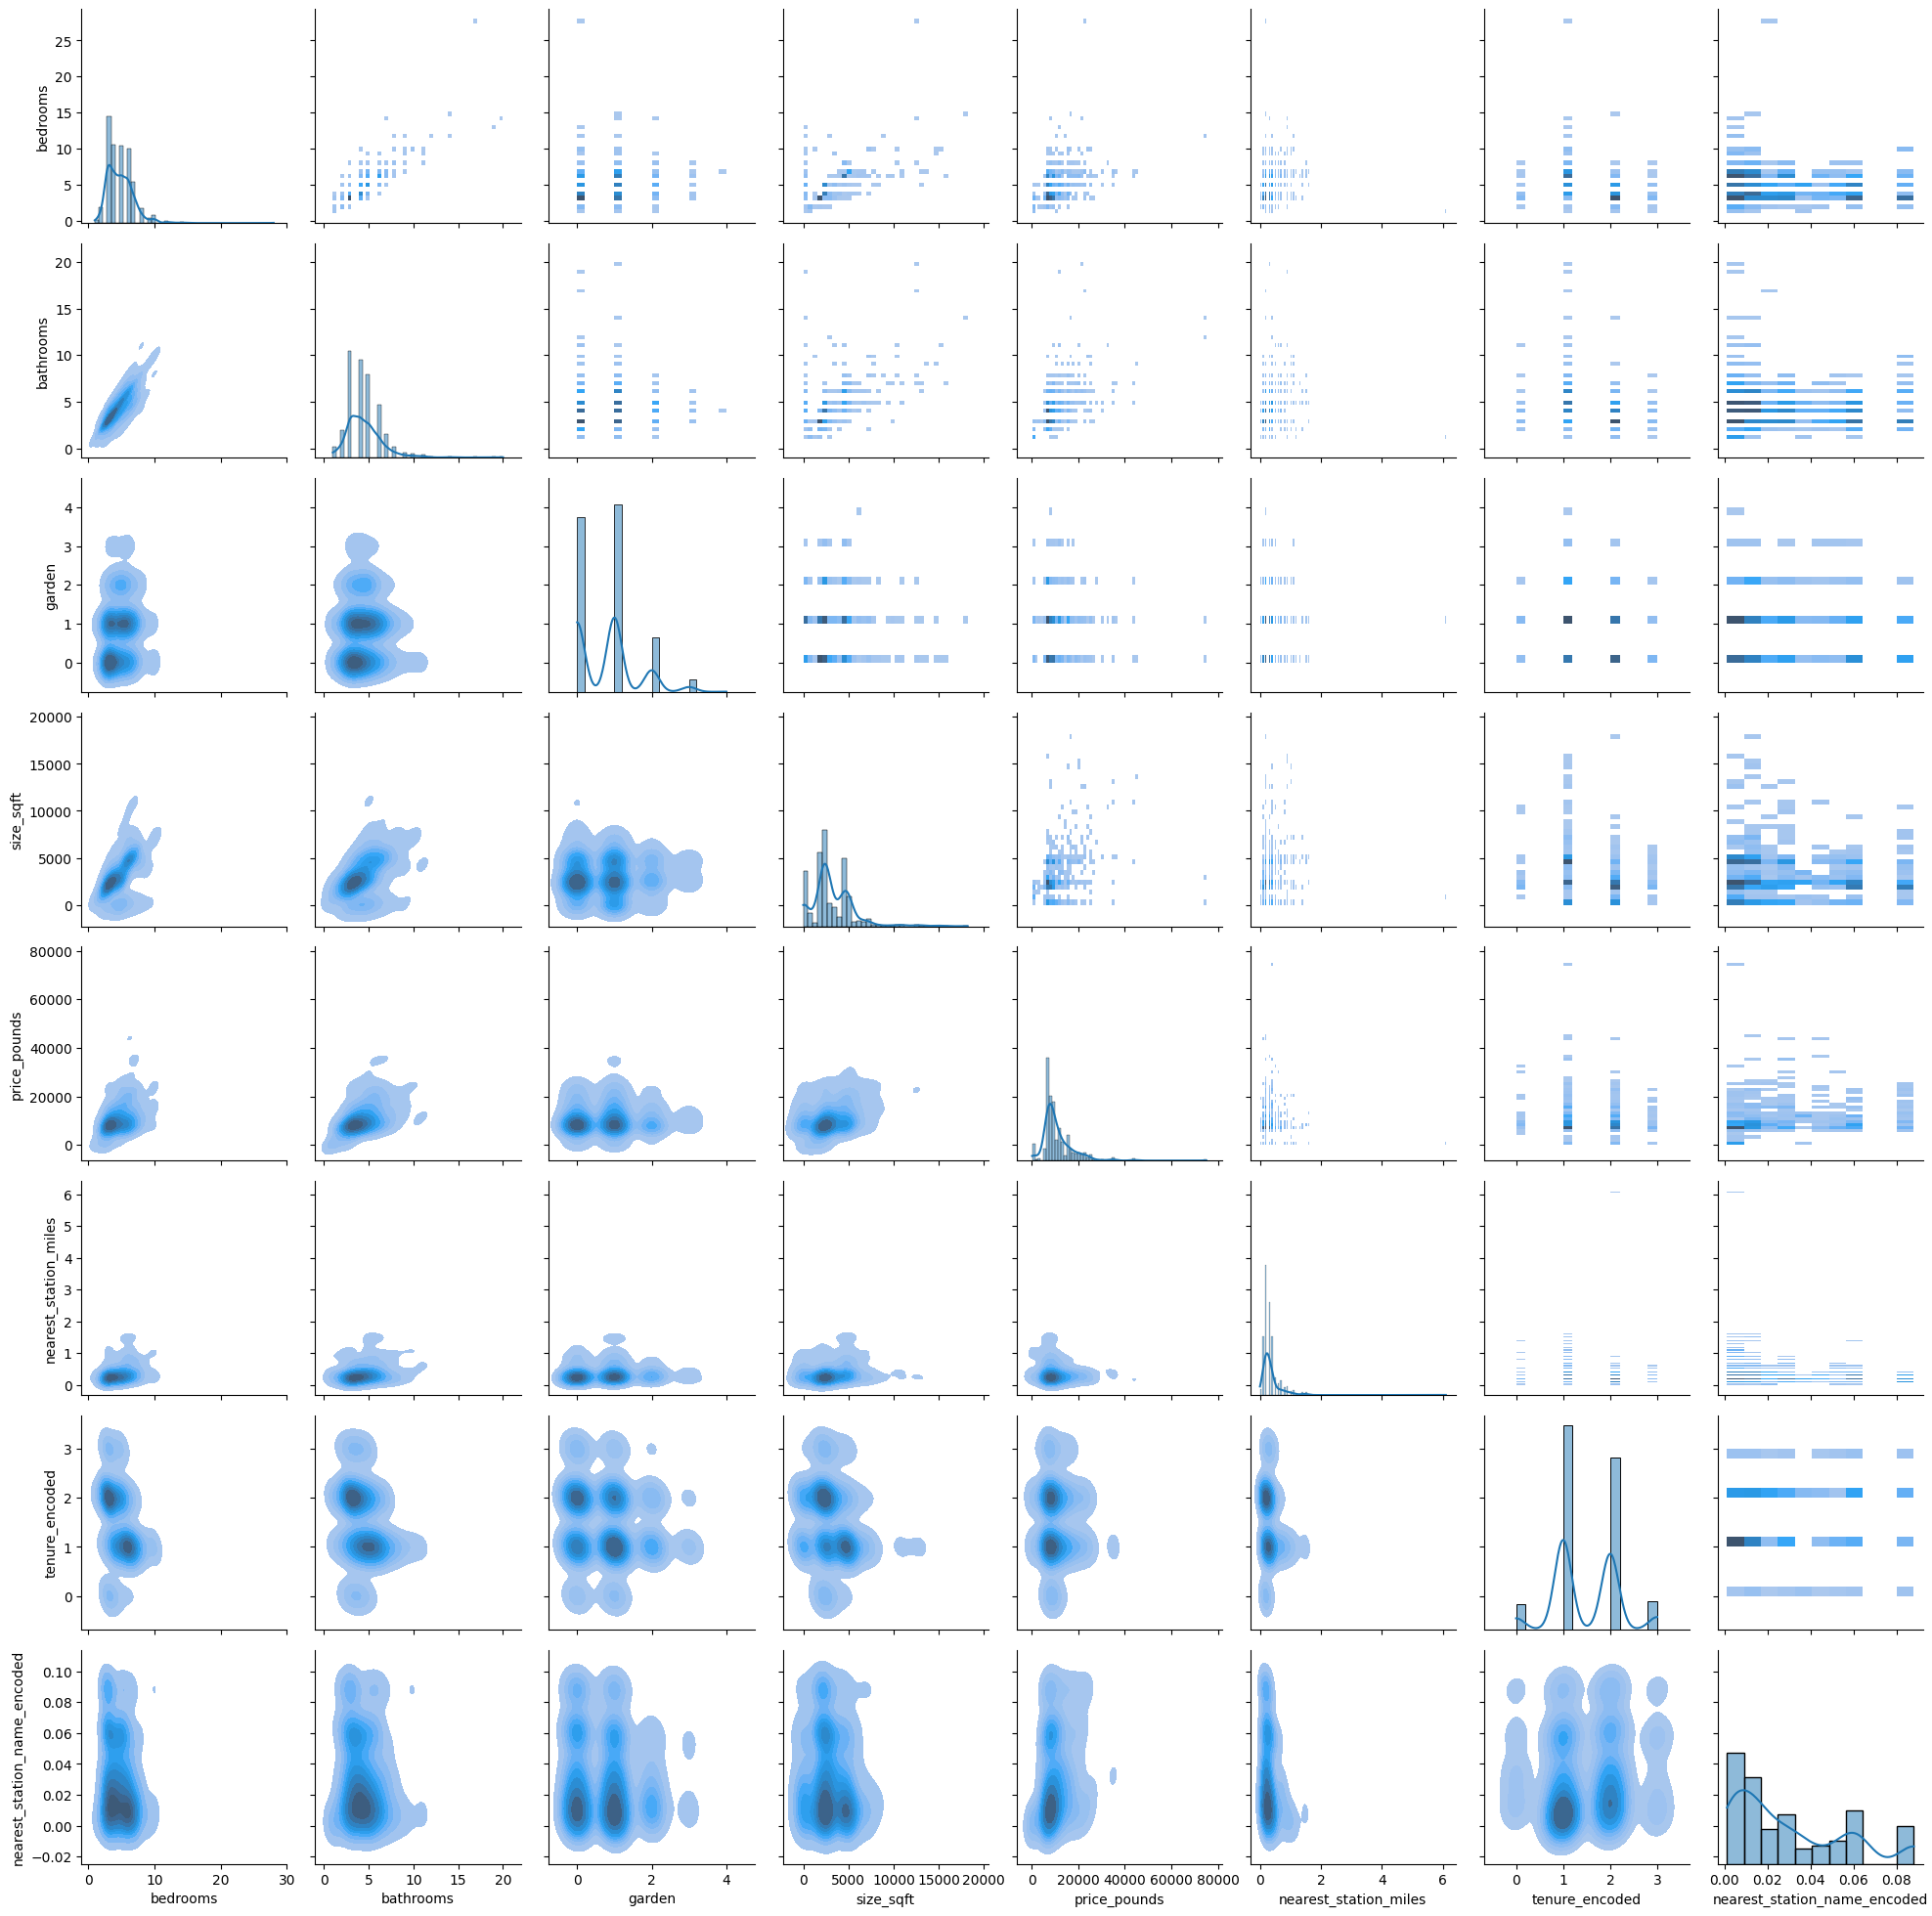

In [ ]:
g = sns.PairGrid(df_dep)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

 Построение и анализ модели дерева решений

Цель: Использовать данные о недвижимости для построения модели дерева решений, проверки на переобучение и ручной подгонки гиперпараметров.

1. Построение базовой модели дерева решений:
   - Используйте `DecisionTreeRegressor`
   - Обучите модель на тренировочных данных и оцените её производительность с помощью соответствующих метрик на тестовых данных.

2. Проверка на переобучение:
   - Сравните производительность модели на тренировочном и тестовом наборах.
   - Используйте визуализацию для вывода дерева

3. Ручная подгонка гиперпараметров:
   - Варьируйте параметры `max_depth`, `min_samples_split`, наблюдая за изменениями в производительности модели.
   - Запишите результаты изменений и выберите лучшие параметры, которые минимизируют переобучение и оптимизируют производительность.

4. Визуализация дерева:
   - Используйте `plot_tree` из библиотеки `sklearn.tree` для визуализации построенного дерева, что поможет в интерпретации модели.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
from sklearn.metrics import r2_score
import graphviz


# Подготовка данных
X = df_dep.drop('price_pounds', axis=1)  # Исключаем целевую переменную
y = df_dep['price_pounds']               # Целевая переменная

# Деление данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели дерева решений
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Визуализация дерева решений
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=X.columns,
                                class_names='price_pounds',
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format='png')
graph.view()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.669986 to fit


'decision_tree.pdf'

[Text(0.5521368160264288, 0.9772727272727273, 'x[1] <= 4.5\nsquared_error = 45853199.376\nsamples = 708\nvalue = 10986.515'),
 Text(0.20557954173306503, 0.9318181818181818, 'x[6] <= 0.005\nsquared_error = 18180819.782\nsamples = 406\nvalue = 8761.55'),
 Text(0.046888504753673295, 0.8863636363636364, 'x[1] <= 2.5\nsquared_error = 15644040.456\nsamples = 62\nvalue = 5127.2'),
 Text(0.02592912705272256, 0.8409090909090909, 'x[6] <= 0.002\nsquared_error = 3347480.221\nsamples = 20\nvalue = 1176.822'),
 Text(0.019878997407087293, 0.7954545454545454, 'x[4] <= 0.1\nsquared_error = 23586.445\nsamples = 16\nvalue = 536.653'),
 Text(0.018150388936905792, 0.75, 'squared_error = 0.0\nsamples = 1\nvalue = 900.0'),
 Text(0.021607605877268798, 0.75, 'x[3] <= 2535.612\nsquared_error = 15770.719\nsamples = 15\nvalue = 512.43'),
 Text(0.019878997407087293, 0.7045454545454546, 'x[4] <= 3.65\nsquared_error = 10568.384\nsamples = 14\nvalue = 491.889'),
 Text(0.018150388936905792, 0.6590909090909091, 'x[4] 

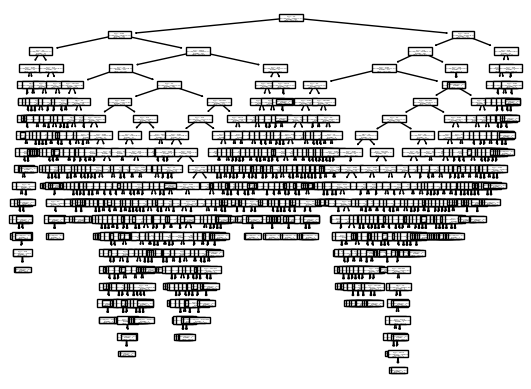

In [ ]:
tree.plot_tree(model)

In [ ]:
r2_score(y_test, model.predict(X_test))

0.3236422328065852

In [ ]:
r2_score(y_train, model.predict(X_train))

0.9921902354772474

`min_samples_split`  
Этот параметр определяет минимальное количество образцов, необходимых для того, чтобы узел мог быть разделен на два дочерних узла. Если количество образцов в узле меньше, чем заданное значение, узел не будет разделен, и он станет листом (leaf node).  
`min_samples_leaf `   
 Этот параметр определяет минимальное количество образцов, которые должны находиться в каждом листе (leaf node) дерева. Если после разбиения узла хотя бы один из дочерних узлов будет содержать меньше образцов, чем указано в min_samples_leaf, то такое разбиение не будет разрешено.

In [ ]:
# Тестирование различных параметров
depths = [3, 5, 7, 9, 10]
splits = [2, 5, 10, 15, 20]
samples_leaf = [2, 3, 4, 5, 6]
for depth in depths:
    for split in splits:
      for leaf in samples_leaf:
        model = DecisionTreeRegressor(max_depth=depth, min_samples_split=split, min_samples_leaf=leaf, random_state=42)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        r2 = r2_score(y_test, predictions)
        print(f"Глубина дерева: {depth}, минимальное число образцов в узле: {split}, минимальное количество образцов {leaf} R^2: {r2}")

Глубина дерева: 3, минимальное число образцов в узле: 2, минимальное количество образцов 2 R^2: 0.39624228773180536
Глубина дерева: 3, минимальное число образцов в узле: 2, минимальное количество образцов 3 R^2: 0.17918114823450615
Глубина дерева: 3, минимальное число образцов в узле: 2, минимальное количество образцов 4 R^2: 0.17918114823450615
Глубина дерева: 3, минимальное число образцов в узле: 2, минимальное количество образцов 5 R^2: 0.22781228095439687
Глубина дерева: 3, минимальное число образцов в узле: 2, минимальное количество образцов 6 R^2: 0.22781228095439687
Глубина дерева: 3, минимальное число образцов в узле: 5, минимальное количество образцов 2 R^2: 0.39624228773180536
Глубина дерева: 3, минимальное число образцов в узле: 5, минимальное количество образцов 3 R^2: 0.17918114823450615
Глубина дерева: 3, минимальное число образцов в узле: 5, минимальное количество образцов 4 R^2: 0.17918114823450615
Глубина дерева: 3, минимальное число образцов в узле: 5, минимальное кол

In [ ]:
%%time
model2 = DecisionTreeRegressor(random_state=42, max_depth=7,
                              min_samples_split=10, min_samples_leaf=2)
model2.fit(X_train, y_train)
r2_score_tree = r2_score(y_test, model2.predict(X_test))
r2_score_tree

CPU times: user 10.7 ms, sys: 0 ns, total: 10.7 ms
Wall time: 14.1 ms


0.4514833747562019

Цель: Использовать данные о недвижимости для построения и сравнения моделей дерева решений и случайного леса.  
- Построение моделей:
Создайте и обучите модель `RandomForestRegressor`   
- Оценка производительности моделей:
  Используйте коэффициент детерминации для оценки обеих моделей на тестовых данных.
- Сравните результаты обеих моделей и определите, какая из них показывает лучшие результаты на вашем наборе данных.




In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor

# Создание и обучение ансамбля RandomForest
forest_model = RandomForestRegressor(n_estimators=200, random_state=42)
forest_model.fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)
forest_r2 = r2_score(y_test, forest_predictions)

# Сравнение результатов
print(f"R^2 для одиночного DecisionTreeRegressor: {r2_score_tree}")
print(f"R^2 для RandomForestRegressor: {forest_r2}")

print(f"Улучшение в R^2: {r2_score_tree - forest_r2}")


R^2 для одиночного DecisionTreeRegressor: 0.4514833747562019
R^2 для RandomForestRegressor: 0.5762919766636576
Улучшение в R^2: -0.12480860190745569
CPU times: user 935 ms, sys: 9.42 ms, total: 944 ms
Wall time: 1.5 s


Цель: Использовать данные о недвижимости для построения и сравнения моделей дерева решений и случайного леса.
- Построение моделей:
Создайте и обучите модель `GradientBoostingRegressor`
- Оценка производительности моделей:
  Используйте коэффициент детерминации для оценки всех трех моделей на тестовых данных.
- Сравните результаты всех моделей и определите, какая из них показывает лучшие результаты на вашем наборе данных.



In [ ]:
%%time
from sklearn.ensemble import GradientBoostingRegressor

# Создание и обучение ансамбля GradientBoostingRegressor
boosting_model = GradientBoostingRegressor(n_estimators=200, random_state=42)
boosting_model.fit(X_train, y_train)
boosting_predictions = boosting_model.predict(X_test)
boosting_r2 = r2_score(y_test, boosting_predictions)

# Сравнение результатов
print(f"R^2 для одиночного DecisionTreeRegressor: {r2_score_tree}")
print(f"R^2 для RandomForestRegressor: {forest_r2}")
print(f"R^2 для GradientBoostingRegressor: {boosting_r2}")
print(f"Улучшение в R^2: {r2_score_tree - boosting_r2}")
print(f"Улучшение в R^2: {forest_r2 - boosting_r2}")


R^2 для одиночного DecisionTreeRegressor: 0.4514833747562019
R^2 для RandomForestRegressor: 0.5762919766636576
R^2 для GradientBoostingRegressor: 0.5718123458441723
Улучшение в R^2: -0.12032897108797036
Улучшение в R^2: 0.004479630819485325
CPU times: user 208 ms, sys: 1.44 ms, total: 210 ms
Wall time: 208 ms


Анализ важности признаков при использовании различных ансамблевых алгоритмов

Цель: Использовать данные о недвижимости для анализа важности признаков с помощью трех разных моделей: `DecisionTreeRegressor`, `RandomForestRegressor` и `GradientBoostingRegressor`.

1. Анализ важности признаков:
   - Извлеките и сравните важность признаков для всех трех моделей.
   - Визуализируйте эту информацию в виде столбчатых диаграмм, чтобы облегчить сравнение.

2. Оценка моделей:
   - Сравните производительность моделей с учетом важности признаков и выявите, есть ли соответствие между важными признаками и качеством прогнозов.

3. Отчет и выводы:
   - Оформите результаты анализа, обсудите, почему некоторые признаки являются более важными в разных моделях.
   - Предложите возможные пути для улучшения моделей, основываясь на полученных данных о важности признаков.

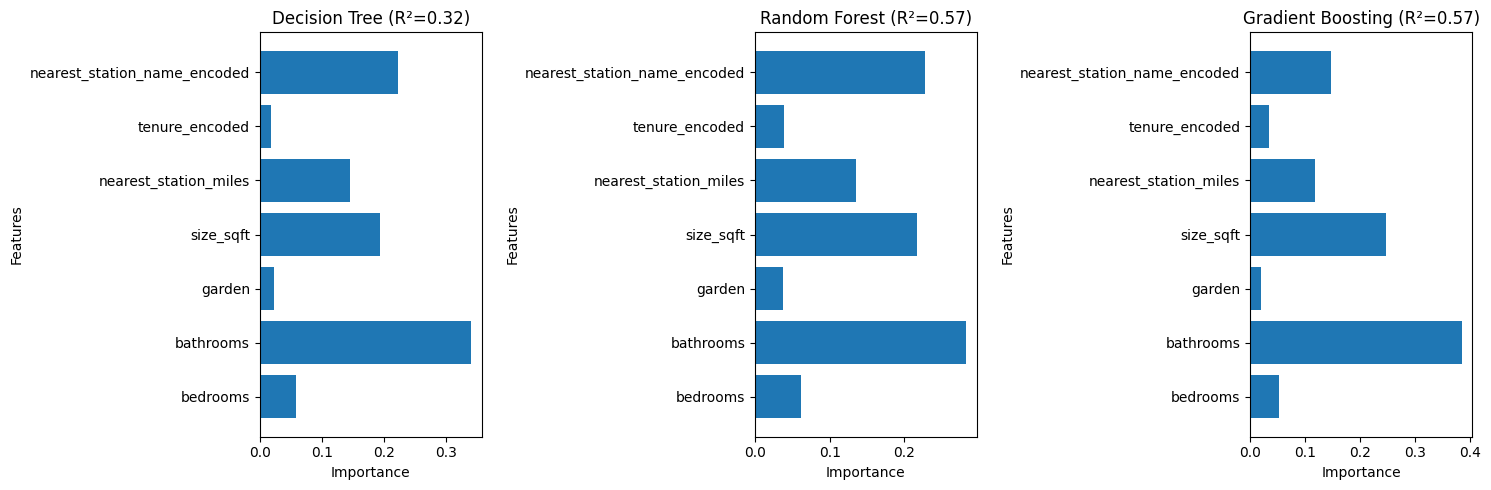

In [ ]:
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Обучение моделей и оценка важности признаков
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for ax, (name, model) in zip(axes, models.items()):
    model.fit(X_train, y_train)
    score = r2_score(y_test, model.predict(X_test))
    feature_importances = model.feature_importances_

    ax.barh(np.arange(len(feature_importances)), feature_importances, align='center')
    ax.set_yticks(np.arange(len(X.columns)))
    ax.set_yticklabels(X.columns)
    ax.set_title(f'{name} (R²={score:.2f})')
    ax.set_xlabel('Importance')
    ax.set_ylabel('Features')

plt.tight_layout()
plt.show()

### Отчет и выводы

#### Сравнение производительности моделей

На графиках показаны важности признаков для трех моделей: Decision Tree, Random Forest и Gradient Boosting, а также их коэффициенты детерминации (R²).
- Decision Tree R² = 0.32
- Random Forest R² = 0.57
- Gradient Boosting R² = 0.57

Очевидно, что модели Random Forest и Gradient Boosting работают значительно лучше, чем Decision Tree, так как у них более высокие значения R².

#### Анализ важности признаков

Исходя из проведенного анализа, можно выделить ключевые признаки, которые оказали наибольшее влияние на прогноз:

1. Bathrooms (санузлы): Этот признак оказался самым важным в моделях Random Forest и Gradient Boosting, а также одним из значимых в Decision Tree.
2. Size_sqft (площадь в квадратных футах): Этот признак занимает второе место по значимости в моделях Random Forest и Gradient Boosting.
3. Bedrooms (спальни): Признак имеет значительное влияние в моделях Decision Tree и Random Forest.
4. Nearest_station_name_encoded (кодировка ближайшего вокзала): Этот признак также значим, особенно в модели Random Forest.
5. Nearest_station_miles (расстояние до ближайшего вокзала в милях) и Garden (сад): Эти признаки имеют меньшую важность, но все равно влияющие на качество прогноза.

Не сильно важные признаки: tenure_encoded (кодировка владения) имеют малое влияние во всех моделях.

#### Соответствие между важными признаками и качеством прогнозов

Модели с более высокими коэффициентами детерминации (Random Forest и Gradient Boosting) придают больше внимания признакам, таким как количество санузлов и площадь в квадратных футах. Это соответствует интуитивному пониманию рынка недвижимости, где площадь и наличие дополнительных санузлов часто играют ключевую роль в оценке стоимости недвижимости.

#### Возможные пути для улучшения моделей

1. Добавление дополнительных признаков: Возможно, добавление новых, релевантных признаков (например, возраст здания, наличие парковки, учебные заведения поблизости и т.д.) может улучшить производительность моделей.
2. Feature engineering: Создание новых признаков на основе существующих данных, например, плотность населения в районе или временные тренды цен на рынке недвижимости.
3. Переобучение моделей с учетом отброса неважных признаков: Возможно, исключение менее значимых признаков, таких как tenure_encoded, может помочь избежать переобучения моделей и улучшить их общую производительность.
4. Использование ансамблевых методов: Хотя Random Forest и Gradient Boosting уже являются ансамблевыми методами, можно рассмотреть их сочетание или добавление других методов (например, Stacking) для повышения предсказательной способности.
5. Hyperparameter tuning (настройка гиперпараметров): Проводить более тщательную настройку гиперпараметров моделей для достижения лучшей производительности.

#### Заключение

Сравнение моделей показало, что Random Forest и Gradient Boosting имеют близкую производительность (R² = 0.57), значительно лучше, чем Decision Tree (R² = 0.32). Основные признаки, влияющие на качество прогнозов, включают количество санузлов, площадь в квадратных футах и количество спален. Рассмотренные пути улучшений могут способствовать повышению точности прогнозов и общей производительности моделей.